In [1]:
import matplotlib.pyplot as plt
import re
import numpy as np

import seaborn as sns
sns.set_theme(font_scale=1.5);

In [2]:
!ls

build_table.ipynb		    G4data_sin45_mono.pkl
build_table_PAD_full.ipynb	    GEANT4-EPP-SIM-FULL.14554423.out
build_table_PAD.ipynb		    GEANT4-EPP-SIM-PAD.14486112.out
build_table_PAD_test2.ipynb	    GEANT4-EPP-SIM-PAD.14502590.out
check_local.ipynb		    output_parser.ipynb
edepProfiles.mat		    plot_atmosphere.ipynb
electron_human_dose_conversion.csv  plot_spectra_iso.ipynb
EPMC_results.png		    plot_spectra_iso_test.ipynb
fig2_results.mat		    sampling_checks.ipynb
G4data_mono_discretePAD.pkl	    test.ipynb
G4data_sin45_exp.pkl		    test_table.ipynb


In [3]:
killedParticleCounter = 0;
killedParticleEnergy  = 0;

altitude = [];
PA       = [];
gyro     = [];

with open("GEANT4-EPP-SIM-FULL.14554423.out", 'r') as f:

    #A = f.readlines()[1445:-1] # 2 thread
    A = f.readlines()[1482:-1] # 40 thread
        
    for line in A:
        if 'Track' in line and 'energy' in line:
            killedParticleCounter += 1
            killedParticleEnergy  += float(line[23:-1].split(' ')[0]);
            
        elif 'position' in line:
                    
            altitude.append(float(line[14:-1].split(' ')[0].split(')')[0].split(',')[2])/1e6+500)
            #pass
            
        elif 'momentum' in line:
            tmp = line[15:-1].split(',')
            px = float(tmp[0])
            py = float(tmp[1])
            pz = float(tmp[2].split(')')[0])
            
            PA.append(np.rad2deg(np.arctan(np.sqrt(px**2 + py**2)/pz)))
            gyro.append(np.rad2deg(np.arctan(py/px)));
                                                
print("Number of killed particles: %.0f\nKilled particle total energy: %.3f keV" % 
      (killedParticleCounter, 1e3*killedParticleEnergy))

del A

Number of killed particles: 29747
Killed particle total energy: 905896.158 keV


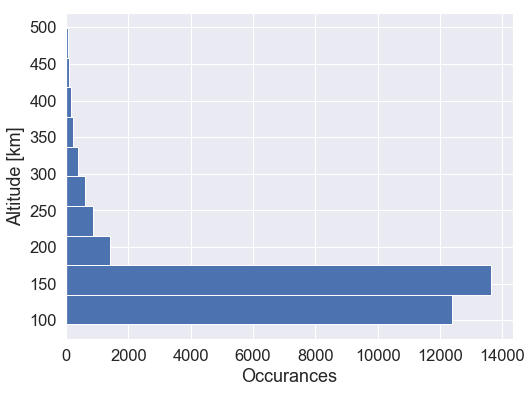

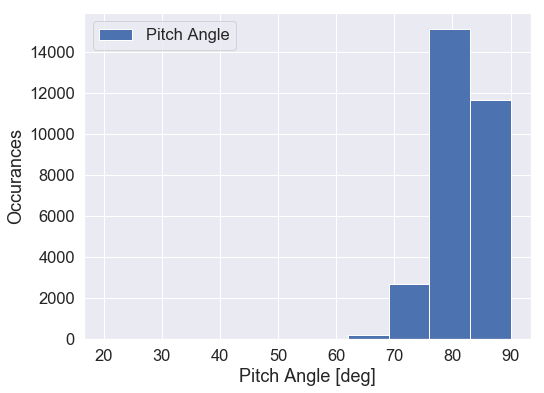

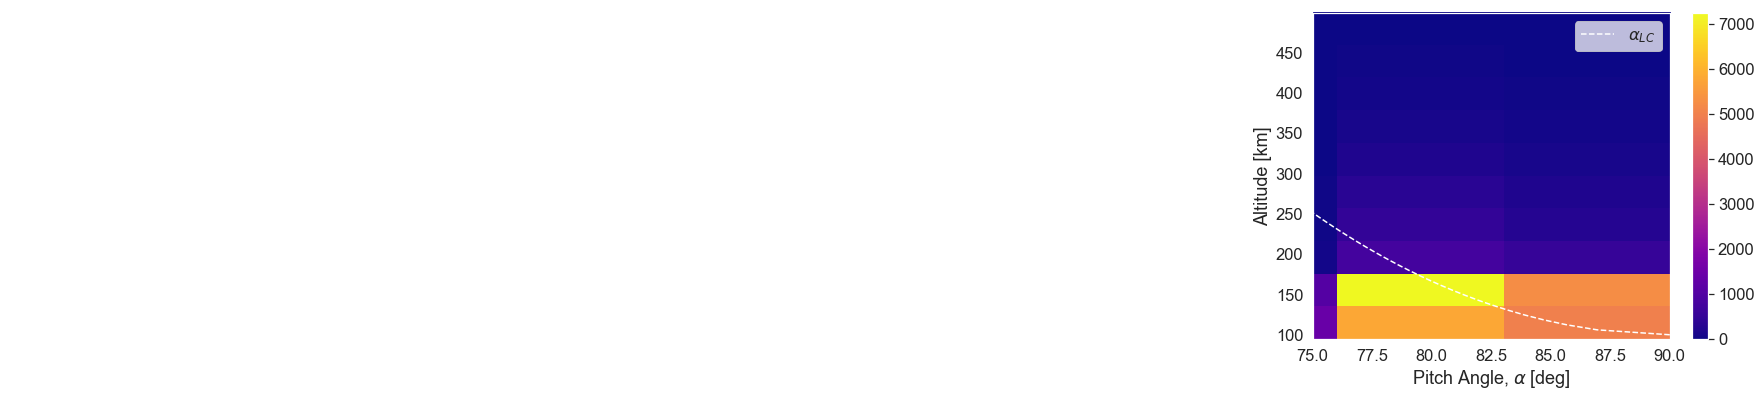

In [4]:
from matplotlib.colors import LogNorm

plt.figure(figsize=(8,6));
plt.hist(altitude, orientation='horizontal', density=False);
plt.ylabel('Altitude [km]');
plt.xlabel('Occurances');

plt.figure(figsize=(8,6));
#plt.hist(np.abs(gyro), bins=20, label='Gyrophase')
plt.hist(np.abs(PA), density=False, label='Pitch Angle');
plt.ylabel('Occurances');
plt.xlabel('Pitch Angle [deg]');
plt.legend();

plt.figure(figsize=(8,6));  plt.grid(False)
plt.hist2d(np.abs(PA), altitude, cmap='plasma')#, norm=LogNorm());
plt.colorbar();
plt.xlabel(r'Pitch Angle, $\alpha$ [deg]');
plt.ylabel('Altitude [km]');

Rearth = 6378
alt = np.linspace(100, 400);
LCangle = np.rad2deg(np.arcsin(np.sqrt( ((Rearth + 100)/(Rearth + alt))**3 )))


#for ind, item in enumerate(alt):
#    print("%.0f, %.0f" % (item, LCangle[ind]))

plt.plot(LCangle, alt, 'w--', label=r'$\alpha_{LC}$')
plt.legend()
plt.xlim(75, 90);

In [10]:


killedParticleCounter = 0;
killedParticleEnergy  = 0;

killedParticleCounter_i  = np.zeros([10,71])
killedParticleEnergy_i   = np.zeros([10,71])

counter_counter = 0
sim_counter_PA  = 0
sim_counter_ene = 0


altitude = [];
PA       = [];
gyro     = [];

# 10 energies
# 71 angles
# 710 simulations

with open("GEANT4-EPP-SIM-FULL.14554423.out", 'r') as f:

    #A = f.readlines()[1445:-1] # 2 thread
    A = f.readlines()[1482:-1] # 40 thread
        
    for line in A:
                        
        if 'Track' in line and 'energy' in line:
            killedParticleCounter += 1
            killedParticleEnergy  += float(line[23:-1].split(' ')[0]);

            killedParticleCounter_i[sim_counter_ene, sim_counter_PA] += 1
            killedParticleEnergy_i[sim_counter_ene, sim_counter_PA]  += float(line[23:-1].split(' ')[0]);

        elif 'position' in line:

            altitude.append(float(line[14:-1].split(' ')[0].split(')')[0].split(',')[2])/1e6+500)
            #pass

        elif 'momentum' in line:
            tmp = line[15:-1].split(',')
            px = float(tmp[0])
            py = float(tmp[1])
            pz = float(tmp[2].split(')')[0])

            PA.append(np.rad2deg(np.arctan(np.sqrt(px**2 + py**2)/pz)))
            gyro.append(np.rad2deg(np.arctan(py/px)));
                
        elif 'New run:' in line:
            
            counter_counter += 1
            
            if counter_counter > 40:
                counter_counter = 0
                sim_counter_ene += 1
                
                if sim_counter_ene > 9:
                    sim_counter_ene = 0
                    sim_counter_PA += 1

                                                                        
print("Number of killed particles: %.0f\nKilled particle total energy: %.3f keV" % 
      (killedParticleCounter, 1e3*killedParticleEnergy))

del A

Number of killed particles: 29747
Killed particle total energy: 905896.158 keV


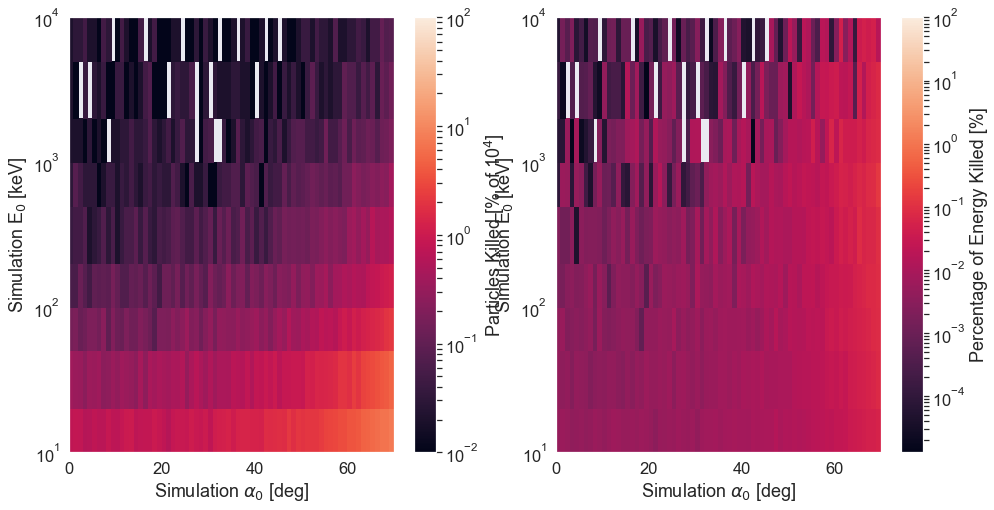

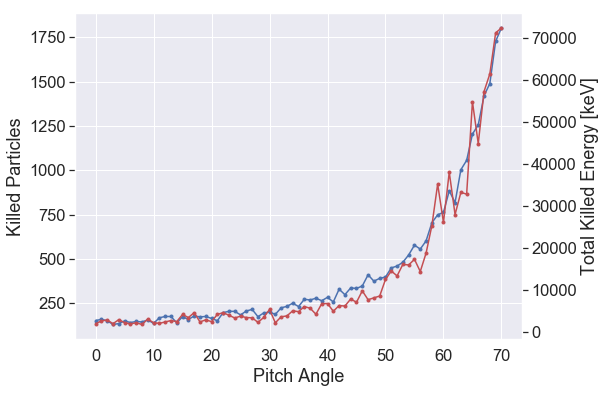

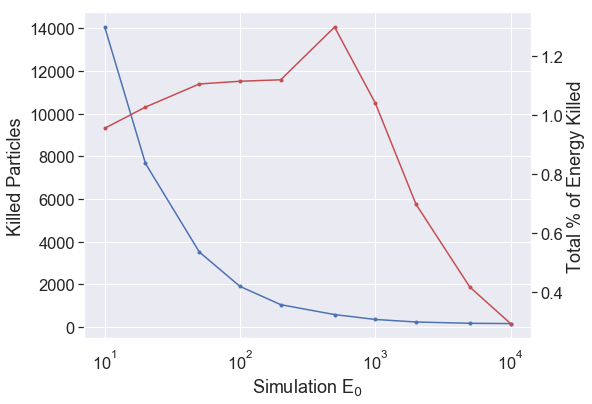

In [77]:

run_list = [10,20,50,100,200,500,1000,2000,5000,10000]
PA = np.linspace(0, 70, 71)
X, Y = np.meshgrid(PA, run_list)


plt.figure(figsize=(16,8)); plt.subplot(1,2,1)
plt.pcolormesh(X, Y, 100 * killedParticleCounter_i / 1e4, norm=LogNorm(), vmax=100);
plt.colorbar(label='Particles Killed [% of 10$^4$]');

plt.ylabel('Simulation E$_0$ [keV]');
plt.xlabel('Simulation $\\alpha_0$ [deg]');
plt.yscale('log')

plt.subplot(1,2,2); 
plt.pcolormesh(X, Y, 100 * 1e3*killedParticleEnergy_i / (1e4*1000), norm=LogNorm(), vmax=100);
plt.colorbar(label='Percentage of Energy Killed [%]');

plt.ylabel('Simulation E$_0$ [keV]');
plt.xlabel('Simulation $\\alpha_0$ [deg]');
plt.yscale('log')

plt.figure(figsize=(8,6))
plt.plot(PA, np.sum(killedParticleCounter_i, axis=0), '.-');
plt.ylabel('Killed Particles')
plt.xlabel('Pitch Angle');

ax = plt.twinx(); ax.grid(False)
ax.plot(PA, 1e3*np.sum(killedParticleEnergy_i, axis=0), 'r.-')
ax.set_ylabel('Total Killed Energy [keV]')


plt.figure(figsize=(8,6))
plt.plot(run_list, np.sum(killedParticleCounter_i, axis=1), '.-');
plt.ylabel('Killed Particles')
plt.xlabel('Simulation E$_0$');
plt.xscale('log')

ax = plt.twinx(); ax.grid(False)
ax.plot(run_list, 100. * 1e3*np.sum(killedParticleEnergy_i, axis=1) / (1e4*1000), 'r.-');
ax.set_ylabel('Total % of Energy Killed');